In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/leozhao/opt/anaconda3/envs/ml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


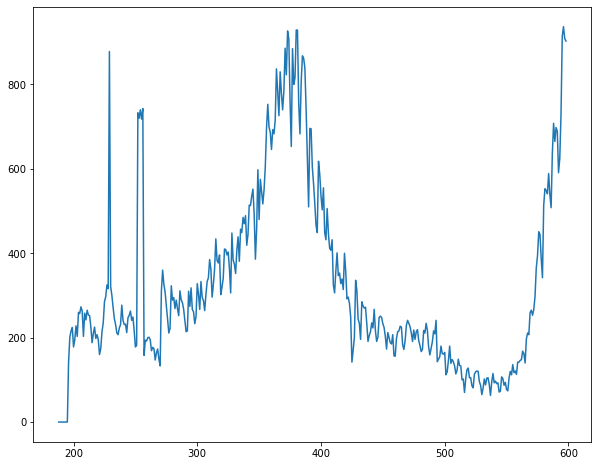

In [55]:
# load ground truth

raw_data = pd.read_csv('./data/covid-hospitalization-daily-all-state-merged_vEW202133.csv')

region = 'GA'

region_data = raw_data['cdc_hospitalized'].to_numpy()[np.where(raw_data['region'] == region)]

plt.figure(figsize=(10,8))
plt.plot(region_data)
plt.show()


In [56]:
# load predictions
path = './results/' + region
epi_list = range(36, 53)

pred_dict = {}

for epiweek in epi_list:
    pred = pd.read_csv(path + '/preds_hosp_2020{}_exp001.csv'.format(epiweek))
    pred = pred['hospitalization'].to_numpy()
    pred_dict[epiweek] = pred

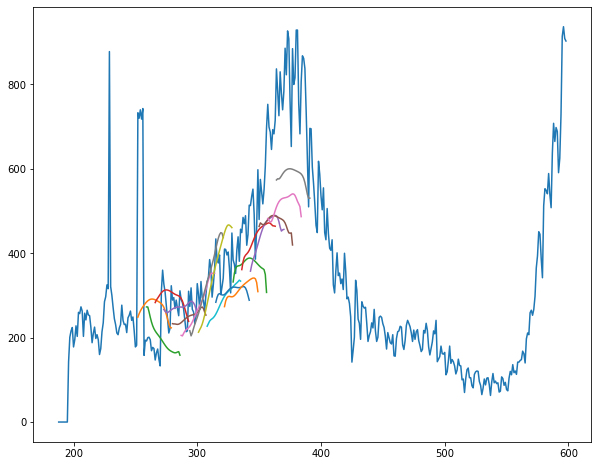

In [57]:
plt.figure(figsize=(10,8))
plt.plot(region_data, label='ground truth')
for epiweek in epi_list:
    plt.plot(range((epiweek+0)*7, (epiweek+0)*7 + 28), pred_dict[epiweek], label='pred_from_2020{}'.format(epiweek))

plt.show()